In [22]:
import importlib
import src.experiment as exp
importlib.reload(exp)

<module 'src.experiment' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/src/experiment.py'>

Running GS-DBSCAN

['/home/hphi344/Documents/GS-DBSCAN-Analysis/../GS-DBSCAN-CPP/build-release/GS-DBSCAN', '--datasetFilename', '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist_images_col_major.bin', '--outFile', '/home/hphi344/Documents/GS-DBSCAN-Analysis/results/batch_experiments/results_n70000_d784_D1024_mp50_k2_m2000_e0.11_a1.2_dbs10_dmCOSINE_cbs256_coc0_nn1.json', '--n', '70000', '--d', '784', '--D', '1024', '--minPts', '50', '--k', '2', '--m', '2000', '--eps', '0.11', '--alpha', '1.2', '--distancesBatchSize', '10', '--distanceMetric', 'COSINE', '--clusterBlockSize', '256', '--clusterOnCpu', '1', '--needToNormalize', '1']
Standard Output:
 Args: {
    "D": 1024,
    "alpha": 1.2000000476837158,
    "clusterBlockSize": 256,
    "clusterOnCpu": true,
    "d": 784,
    "datasetFilename": "/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist_images_col_major.bin",
    "distanceMetric": "COSINE",
    "distancesBatchSize": 10,
    "eps": 0.10999999940395355,
    "k": 2,
    "m": 

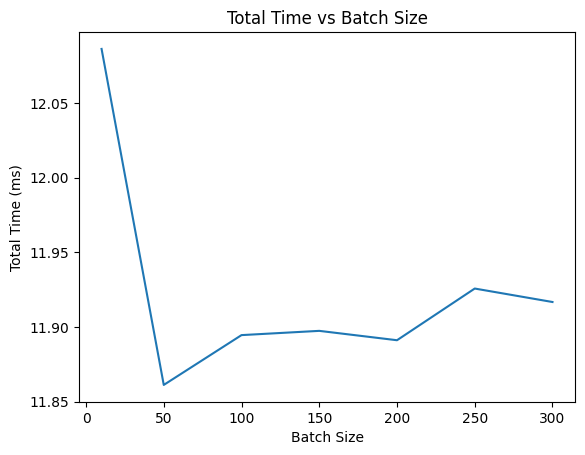

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

distance_batch_sizes = [10, 50, 100, 150, 200, 250, 300]
# distance_batch_sizes = [10, 500]

results_df = exp.run_batch_experiments(distance_batch_sizes, k = 2, m = 2000, write_to_pickle=True)

def display_batch_experiments_results(results_df):
    total_times = np.array([times["overall"] for times in results_df["times"]]) / 1e6
    distances_times = np.array([times["distances"] for times in results_df["times"]]) / 1e6

    distance_batch_sizes = results_df["batchSize"].values

    batches_df = pd.DataFrame({"batchSize": distance_batch_sizes, "totalTime": total_times, "nmi": results_df["nmi"],
                                "distancesTime": distances_times})

    plt.plot(batches_df["batchSize"], batches_df["totalTime"])
    plt.xscale
    plt.xlabel("Batch Size")
    plt.ylabel("Total Time (ms)")
    plt.title("Total Time vs Batch Size")
    plt.ion()
    plt.show()

display_batch_experiments_results(results_df)